In [2]:
#%run "pokemon_dataCleaning.ipynb"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "../data/pokemon_cleaned.csv"
pokemon = pd.read_csv(path, index_col = 0)
pokemon.head()

,pokedex_number,name,type1,type2,generation,hp,attack,defense,sp_attack,sp_defense,...,percentage_male,weight_kg,is_legendary,percentage_female,ability_0,ability_1,ability_2,ability_3,ability_4,ability_5
0,1,Bulbasaur,grass,poison,1,45,49,49,65,65,...,88.1,6.9,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
1,2,Ivysaur,grass,poison,1,60,62,63,80,80,...,88.1,13.0,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
2,3,Venusaur,grass,poison,1,80,100,123,122,120,...,88.1,100.0,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
3,4,Charmander,fire,none,1,39,52,43,60,50,...,88.1,8.5,0,11.9,Blaze,Solar Power,NaN,NaN,NaN,NaN
4,5,Charmeleon,fire,none,1,58,64,58,80,65,...,88.1,19.0,0,11.9,Blaze,Solar Power,NaN,NaN,NaN,NaN


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pokemon, test_size = 0.2, random_state = 1234)

In [4]:
train.sort_values("pokedex_number", inplace = True)

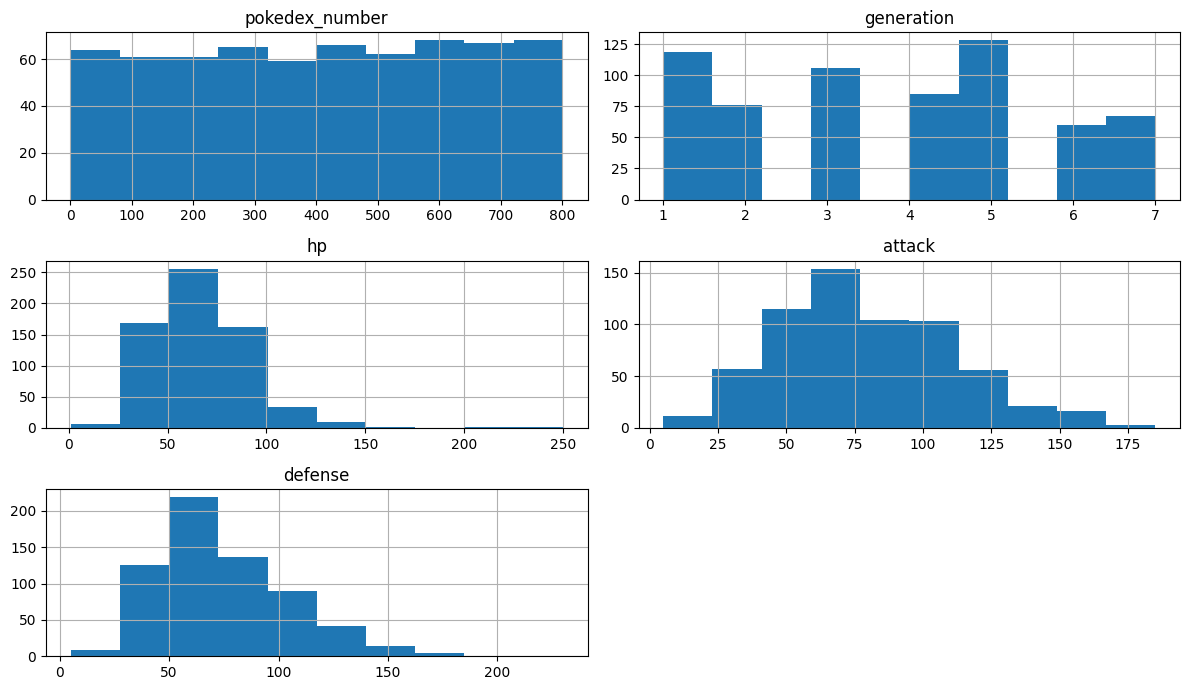

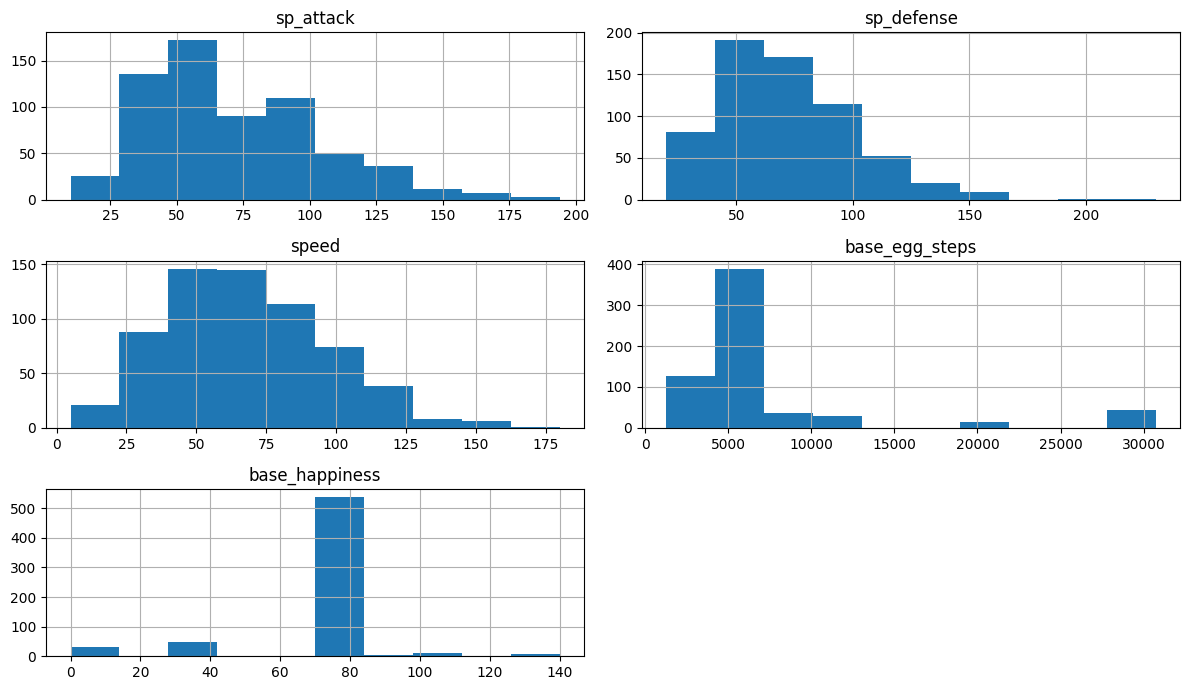

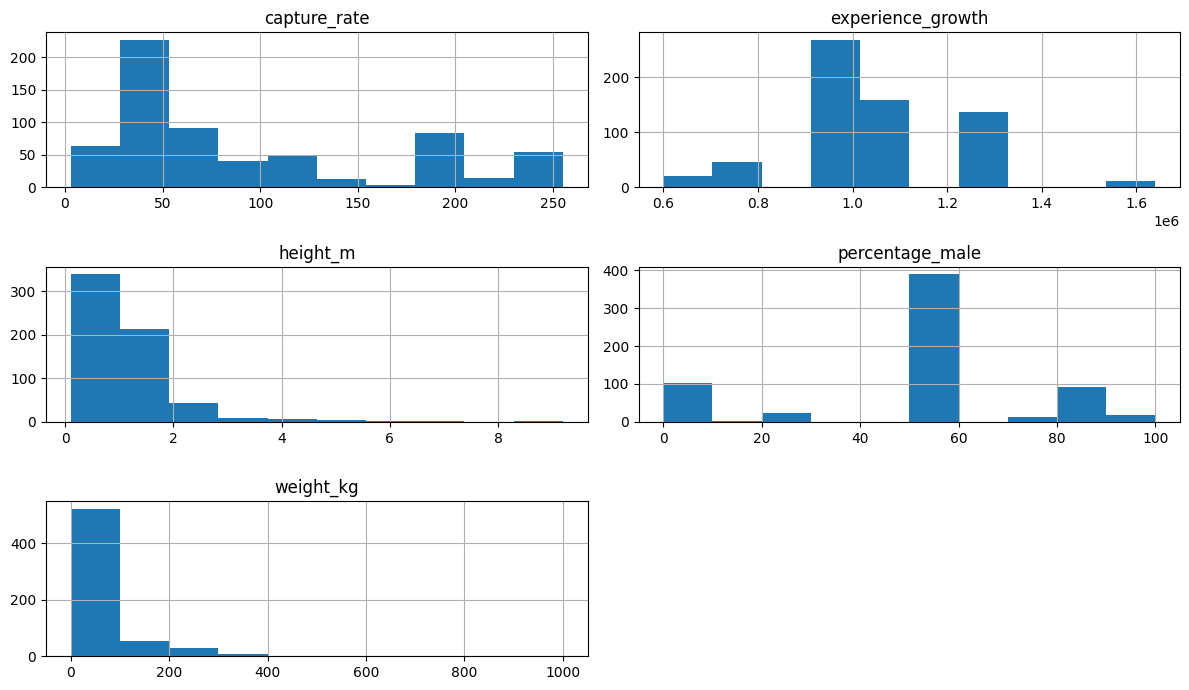

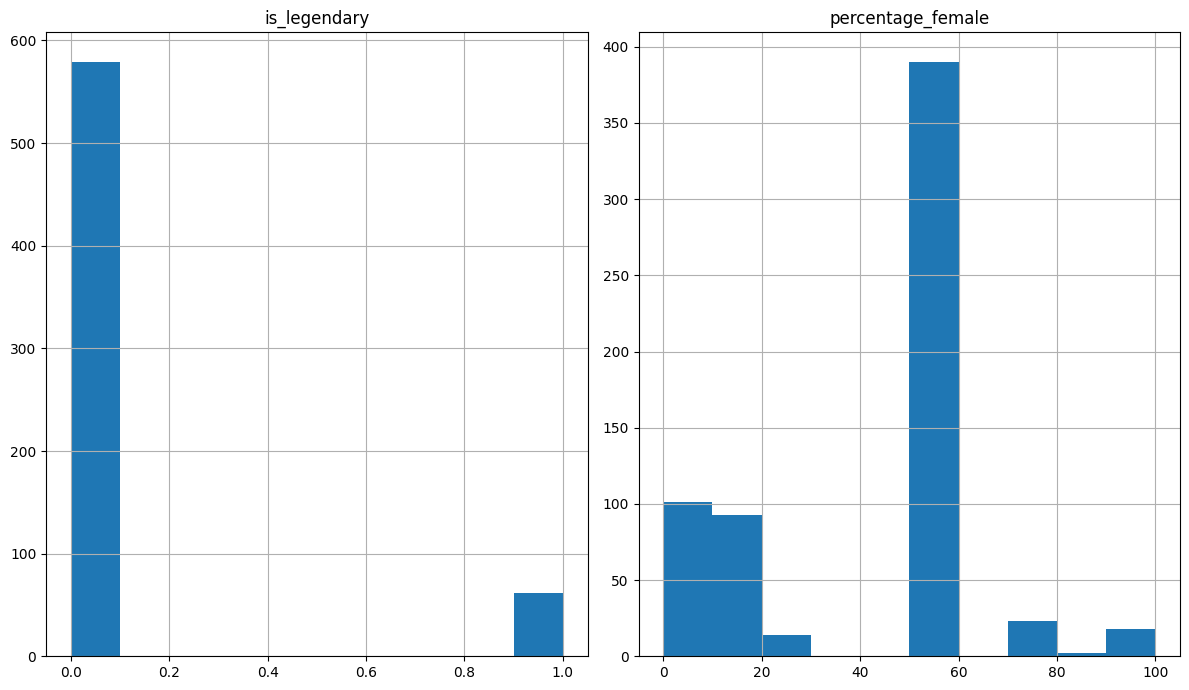

In [ ]:
num_cols = train.select_dtypes(include = "number").columns
n = len(num_cols)
m = 5

for i in range(0, n, m):
    subset = num_cols[i: i + m]
    if not subset.empty:
        train[subset].hist(figsize=(12, 7))
        plt.tight_layout()
        plt.show()

In [16]:
from pandas.plotting import scatter_matrix

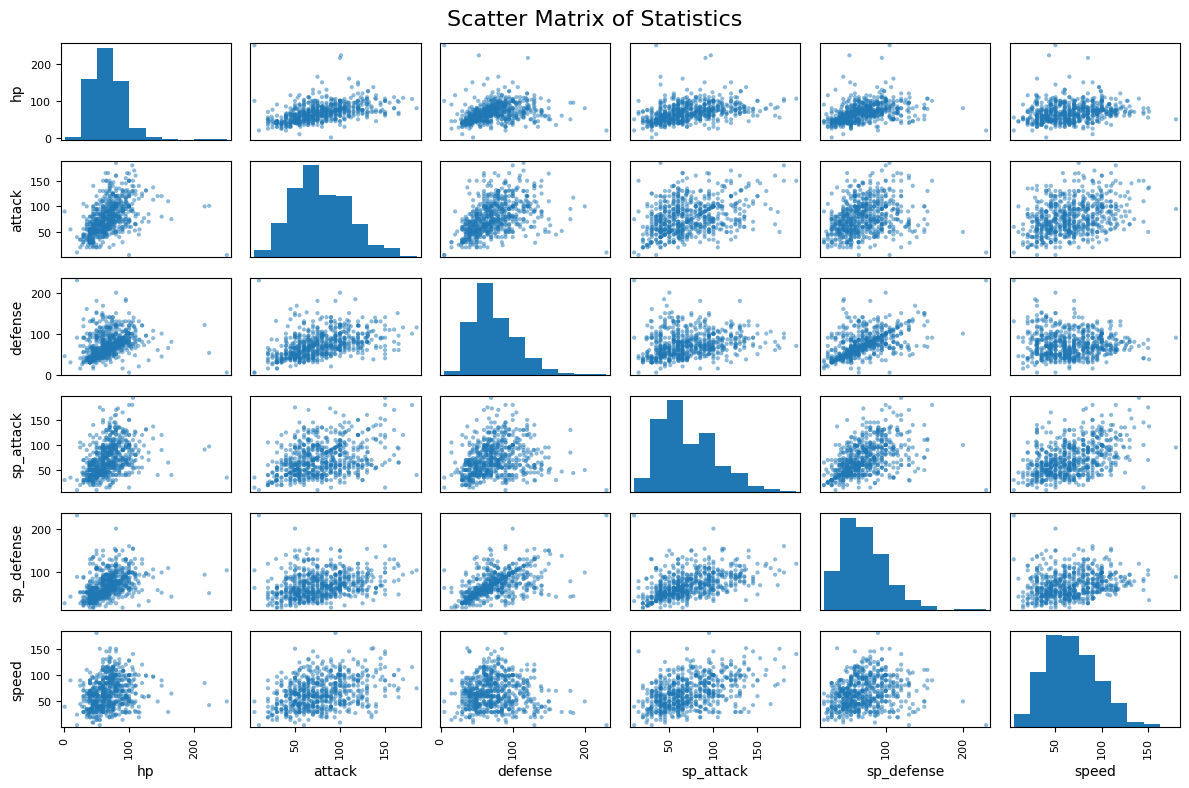

In [21]:
scatter_matrix(train[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]], figsize = (12, 8))
plt.suptitle("Scatter Matrix of Statistics", fontsize = 16)
plt.tight_layout()
plt.show()

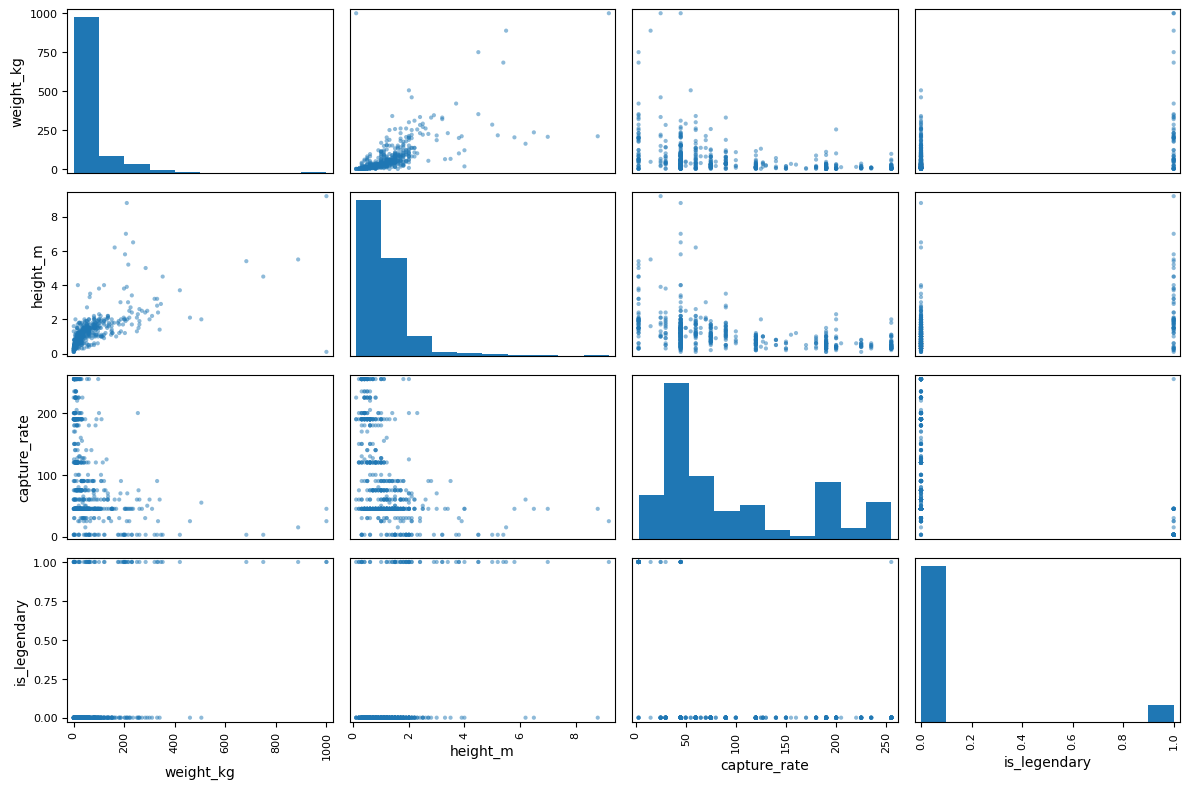

In [22]:
scatter_matrix(train[['weight_kg', 'height_m', 'capture_rate', 'is_legendary']], figsize = (12, 8))
plt.tight_layout()
plt.show()

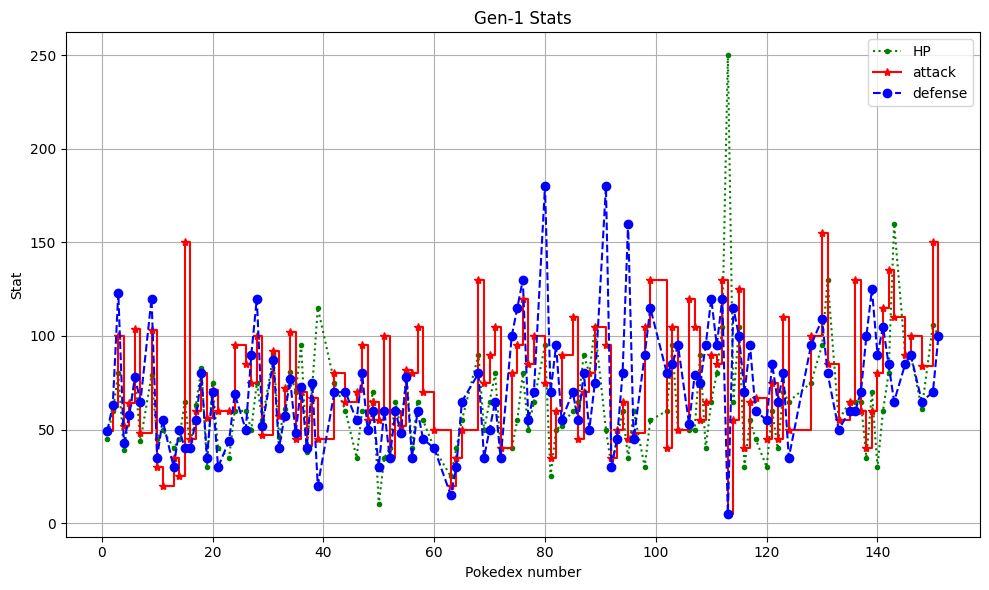

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

gen1 = train.loc[train["generation"] == 1, :]

ax.plot(gen1["pokedex_number"], gen1["hp"], color = "g", linestyle = ":", marker = ".", label = "HP")
ax.plot(gen1["pokedex_number"], gen1["attack"], color = "r", drawstyle = "steps-post", marker = "*", label = "attack")
ax.plot(gen1["pokedex_number"], gen1["defense"], color = "b", linestyle = "--", marker = "o", label = "defense")

ax.set_title("Gen-1 Stats")
ax.set_xlabel("Pokedex number")
ax.set_ylabel("Stat")
ax.legend(loc = "best")
ax.grid(True)

plt.tight_layout()
plt.show()

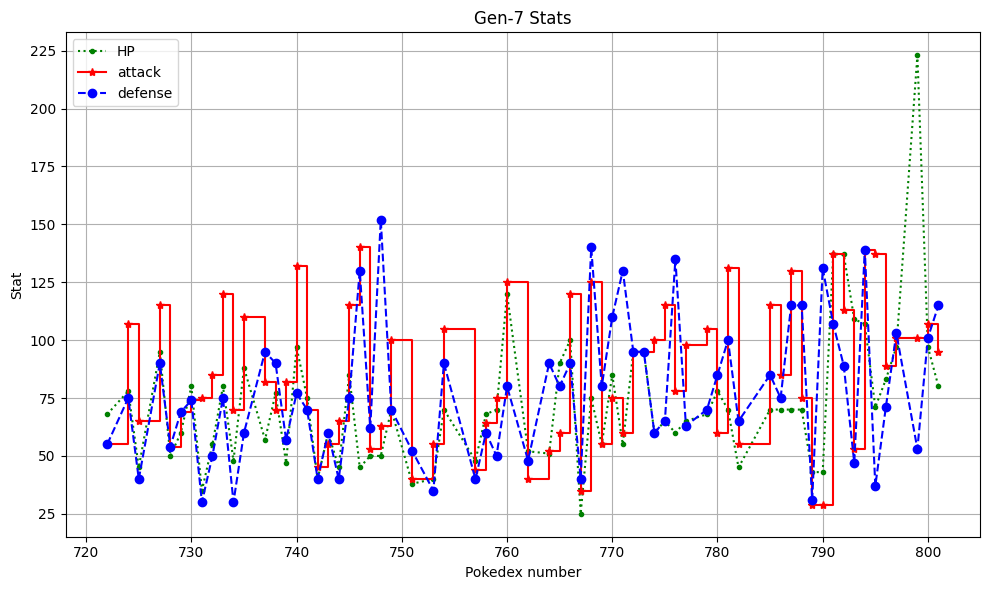

In [35]:
fig, ax = plt.subplots(figsize = (10, 6))

gen7 = train.loc[train["generation"] == 7, :]

ax.plot(gen7["pokedex_number"], gen7["hp"], color = "g", linestyle = ":", marker = ".", label = "HP")
ax.plot(gen7["pokedex_number"], gen7["attack"], color = "r", drawstyle = "steps-post", marker = "*", label = "attack")
ax.plot(gen7["pokedex_number"], gen7["defense"], color = "b", linestyle = "--", marker = "o", label = "defense")

ax.set_title("Gen-7 Stats")
ax.set_xlabel("Pokedex number")
ax.set_ylabel("Stat")
ax.legend(loc = "best")
ax.grid(True)

plt.tight_layout()
plt.show()

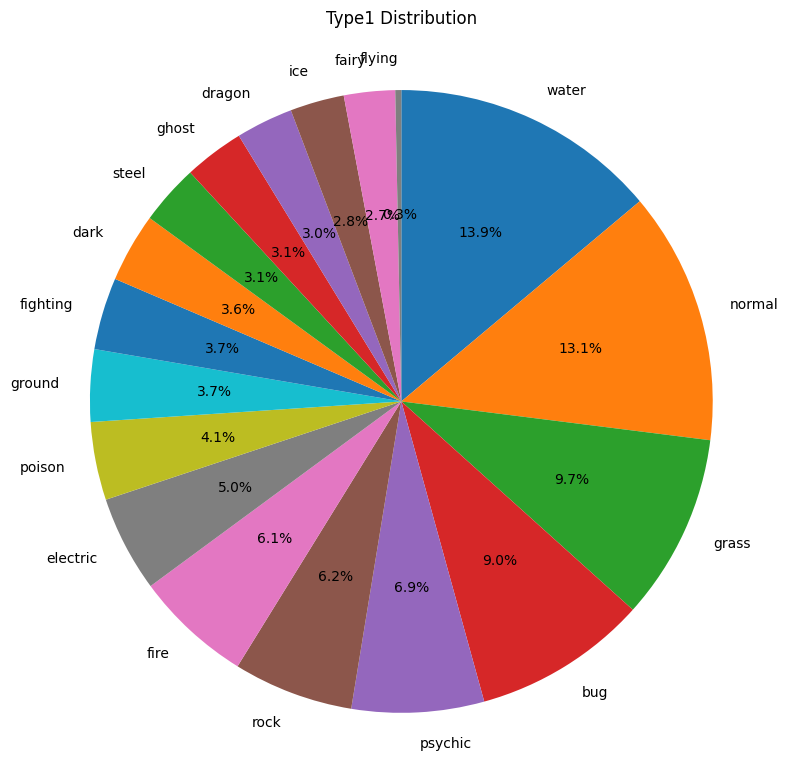

In [71]:
labels, counts = np.unique(train["type1"], return_counts=True)
sizes = counts / counts.sum()

sorted_indices = np.argsort(sizes)[::-1]
sizes = sizes[sorted_indices]
labels = labels[sorted_indices]

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(sizes, labels = labels,
       autopct = "%1.1f%%",
       startangle = 90,
       counterclock = False )
ax.axis('equal')

plt.title("Type1 Distribution")
plt.tight_layout()
plt.show()

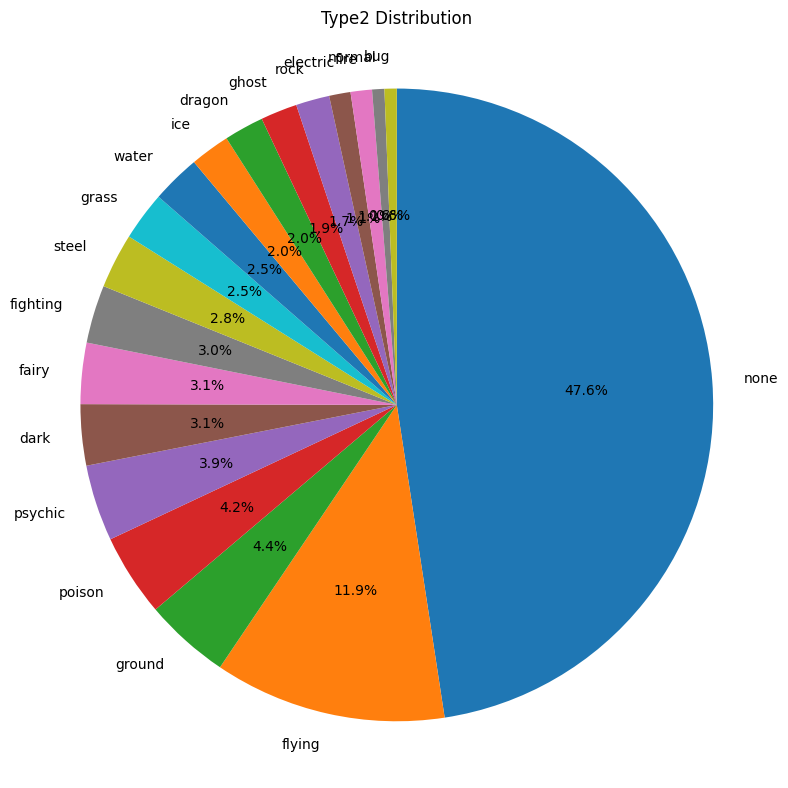

In [70]:
labels, counts = np.unique(train["type2"], return_counts=True)
sizes = counts / counts.sum()

sorted_indices = np.argsort(sizes)[::-1]
sizes = sizes[sorted_indices]
labels = labels[sorted_indices]

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(sizes, labels = labels,
       autopct = "%1.1f%%",
       startangle = 90,
       counterclock = False )
ax.axis('equal')

plt.title("Type2 Distribution")
plt.tight_layout()
plt.show()